## Постановка задачи

1. Зарегистрироваться на сайте kaggle.com.
2. Скачать данные train.csv из раздела "Data" (https://www.kaggle.com/c/titanic/data).
3. Разбить данные на тренировочные и тестовые.
4. Создать и обучить модель на тренировочных данных.
5. Оценить модель на датасете test.

In [138]:
import numpy as np # импортируем библиотеку Numpy
import pandas as pd # импортируем библиотеку Pandas
import matplotlib.pyplot as plt # импортируем библиотеку Matplotlib

In [139]:
titanic_train_data = pd.read_csv('https://raw.githubusercontent.com/Andruchelli/Titanic/main/train.csv') # прочитаем файл с тренировочными данными
titanic_test_data = pd.read_csv('https://raw.githubusercontent.com/Andruchelli/Titanic/main/test.csv') # прочитаем файл с тестовыми данными, который будет использоваться для решения задачи по определению выживаемости пассажиров

In [140]:
titanic_train_data.head() # проверяем, что первый файл прочитался

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [142]:
titanic_train_data.shape # смотрим размерность датасета с тренировочными данными

(891, 12)

In [143]:
titanic_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


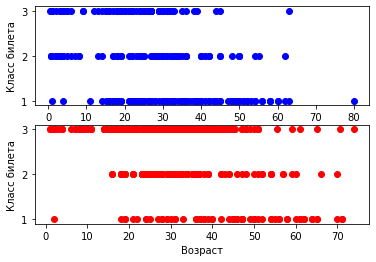

In [144]:
# визуализируем график выживших пассажиров синим
x_survived = titanic_train_data[titanic_train_data['Survived'] == 1]['Age'] # по возрасту
y_survived = titanic_train_data[titanic_train_data['Survived'] == 1]['Pclass'] # по классу билета

# визуализируем график погибших пассажиров красным
x_died = titanic_train_data[titanic_train_data['Survived'] == 0]['Age'] # по возрасту
y_died = titanic_train_data[titanic_train_data['Survived'] == 0]['Pclass'] # по классу билета

plt.subplot(211)
plt.plot(x_survived, y_survived, 'bo')
plt.xlabel('Возраст')
plt.ylabel('Класс билета')

plt.subplot(212)
plt.plot(x_died, y_died, 'ro')
plt.xlabel('Возраст')
plt.ylabel('Класс билета')
plt.show()

В получившихся графиках можно заметить некоторые особенности. Например, что самое большое количество погибших приходится на 3-й класс обслуживания в возрасте от ~15 до ~55 лет. В то же время пассажиры такого же возраста, но с билетами 1-го класса, в большинстве своём оказались в числе выживших.

Попробуем на основе данных о возарсте и класса обслуживания пассажиров определить на тестовых данных выжили они или нет.

In [151]:
df = titanic_train_data[['Survived', 'Age', 'Pclass']] # создаём новый датасет для определения выживаемости по двум параметрам: Age и Pclass
df.head()

,Survived,Age,Pclass
0,0,22.0,3
1,1,38.0,1
2,1,26.0,3
3,1,35.0,1
4,0,35.0,3


In [152]:
df.shape # проверяем размерность нового датасета

(891, 3)

In [147]:
np.sum(df['Survived'].isna()) # считаем количество ячеек в столбце Survived со значением NaN

0

In [148]:
np.sum(df['Pclass'].isna()) # считаем количество ячеек в столбце Pclass со значением NaN

0

In [149]:
np.sum(df['Age'].isna()) # считаем количество ячеек в столбце Age со значением NaN

177

Для дальнейших исследований стоит почистить наш новый датафрейм, так как в столбце **Age** мы получили 177 строк со значением NaN, которые не подходят для обучения модели.

In [153]:
df_dropna = df.dropna(axis=0) # избавляемся от всех рядов, где имеются значения NaN, с помощью метода dropna; axis=0 означает, что мы сбрасываем ряды, где содержатся значения NaN
df_dropna.shape # проверяем размерность нового датасета

(714, 3)

In [155]:
df_dropna.head()

,Survived,Age,Pclass
0,0,22.0,3
1,1,38.0,1
2,1,26.0,3
3,1,35.0,1
4,0,35.0,3


In [164]:
titanic_test_data.head() # проверяем, что второй файл, содержащий тестовые данные, прочитался

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [170]:
np.sum(titanic_test_data['Pclass'].isna()) # считаем количество ячеек в столбце Pclass со значением NaN

0

In [169]:
np.sum(titanic_test_data['Age'].isna()) # считаем количество ячеек в столбце Age со значением NaN

86

In [172]:
titanic_test_dropna = df.dropna(axis=0) # избавляемся от всех рядов, где имеются значения NaN, с помощью метода dropna; axis=0 означает, что мы сбрасываем ряды, где содержатся значения NaN
df_dropna.shape # проверяем размерность нового датасета

(714, 3)

In [176]:
X_train = df_dropna.drop('Survived', axis=1) # задаём в тренировочные данные для обучения модели столбцы Age и Pclass из тренировочного датасета
Y_train = df_dropna['Survived'] # задаём в полученный результат для тренировочных данных столбец Survived из тренировочного датасета

X_test = titanic_test_dropna[['Age', 'Pclass']] # задаём в тестовые данные, по которым будет проводиться обучение модели, столбцы Age и Pclass из тестоового датасета 

In [179]:
X_train.head()

,Age,Pclass
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3


In [180]:
Y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [183]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

clf.fit(X_train, Y_train) # обучаем модель

LogisticRegression()

In [185]:
Y_pred = clf.predict(X_test) # делаем предсказание

In [186]:
Y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,